In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [28]:
df = pd.read_csv("D:\Infosys - AI\Dataset Preparation\Final_Dataset.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441906 entries, 0 to 441905
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Text          441906 non-null  object
 1   IsHatespeech  441906 non-null  object
 2   Content_int   440906 non-null  object
dtypes: object(3)
memory usage: 10.1+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_3332\3890116551.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Infosys - AI\Dataset Preparation\Final_Dataset.csv")


In [31]:
df = df.drop(columns=['Content_int'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441906 entries, 0 to 441905
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Text          441906 non-null  object
 1   IsHatespeech  441906 non-null  object
dtypes: object(2)
memory usage: 6.7+ MB


In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# One Hot Encoder 

One Hot Encoding is a technique used in machine learning to transform categorical data into a format that can be provided to machine learning algorithms to improve predictions. Categorical data, which represents discrete categories or labels, is often non-numeric and cannot be directly used in algorithms that expect numerical input. One Hot Encoding addresses this by converting categorical values into a binary vector representation.

# ONE HOT ENCODER


One Hot Encoding is a technique used in machine learning to transform categorical data into a format that can be provided to machine learning algorithms to improve predictions. Categorical data, which represents discrete categories or labels, is often non-numeric and cannot be directly used in algorithms that expect numerical input. One Hot Encoding addresses this by converting categorical values into a binary vector representation.

One Hot Encoding involves creating a new binary column for each unique category in the original categorical column. Each binary column represents a unique category and contains 1 if the original category is present in that observation, and 0 otherwise. This process effectively transforms categorical variables into a format suitable for machine learning algorithms.

For example, consider a categorical column "Color" with three categories: Red, Green, and Blue. One Hot Encoding transforms this into three binary columns, one for each color:

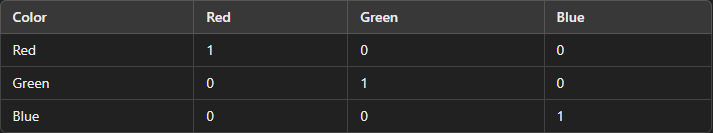

In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#df = pd.read_csv('D:\Infosys - AI\EDA\Preprocessed_cleaned_Final_dataset.csv')

print(df.head(2))
df.info()

# Converting 'IsHatespeech' column to categorical to avoid Bias 
df['IsHatespeech'] = df['IsHatespeech'].astype(str)

encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df[['IsHatespeech']])

# Converting the encoded data into an array
encoded_array = encoded_data.toarray()

# Print the encoded data (this will show the transformed categorical data)
encoded_array

                                                Text IsHatespeech
0  denial of normal the con be asked to comment o...            1
1  just by being able to tweet this insufferable ...            1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441906 entries, 0 to 441905
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Text          441906 non-null  object
 1   IsHatespeech  441906 non-null  object
dtypes: object(2)
memory usage: 6.7+ MB


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

# LABEL ENCODER

Label Encoding is a preprocessing technique used in machine learning to convert categorical data into numerical form. Unlike One Hot Encoding, which creates binary columns for each category, Label Encoding assigns a unique integer to each category. This method is particularly useful when dealing with ordinal categorical data, where the order of categories is important.

What is Label Encoding?
Label Encoding involves mapping each category in a categorical feature to a unique integer. This transformation helps machine learning algorithms that require numerical input to process categorical data effectively.

For example, consider a categorical column "Color" with three categories: Red, Green, and Blue. Label Encoding transforms this into:

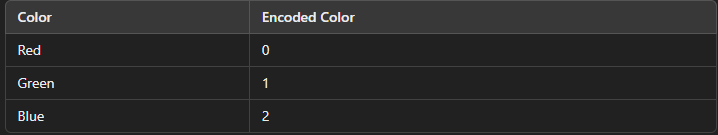

In [34]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Fit the encoder on the categorical features
encoded_data = label_encoder.fit_transform(df[['IsHatespeech']])

print(encoded_data)

[1 1 1 ... 0 0 0]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Observations

• Handles Ordinal Data: Label Encoding is suitable for ordinal data, where the order of categories is meaningful. <br>
• Simplicity: It is simple to implement and requires less memory compared to One Hot Encoding.<br>
• Model Compatibility: Many machine learning algorithms can directly work with label-encoded data.

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
text_features = tfidf_vectorizer.fit_transform(['Text'])

print(text_features)

  (0, 0)	1.0
